###Question#1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,Age,Income,Loan_Amount,Credit_Score,Loan_Approval
0,58,65222,36065,789,1
1,48,93335,30199,685,1
2,34,40965,46976,403,0
3,27,54538,21371,692,1
4,40,38110,16835,545,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
X = df[['Age', 'Income', 'Loan_Amount', 'Credit_Score']]
y = df['Loan_Approval']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

Logistic Regression Accuracy: 0.9


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)
linear_predictions_binary = [1 if pred >= 0.5 else 0 for pred in linear_predictions]

linear_accuracy = accuracy_score(y_test, linear_predictions_binary)
print(f"Linear Regression Accuracy: {linear_accuracy}")

Linear Regression Accuracy: 1.0


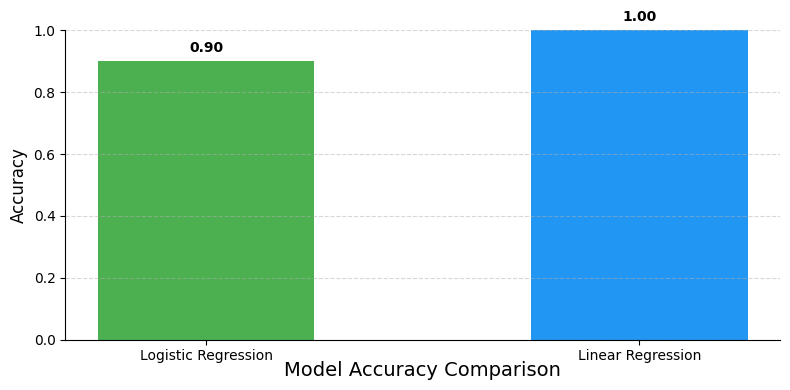

In [ ]:
models = ['Logistic Regression', 'Linear Regression']
accuracies = [logistic_accuracy, linear_accuracy]

plt.figure(figsize=(8, 4))

bars = plt.bar(models, accuracies, color=['#4CAF50', '#2196F3'], width=0.5)

plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.gca().set_facecolor('#ffffff')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.text(0.5, -0.1, 'Model Accuracy Comparison', ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

###Question#2

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
result_classifier = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)
importances_classifier = result_classifier.importances_mean

result_regressor = permutation_importance(rf_regressor, X_test, y_test, n_repeats=10, random_state=42)
importances_regressor = result_regressor.importances_mean

Classifier - Age: -0.0050
Regressor - Age: -0.0042
Classifier - Income: 0.1100
Regressor - Income: 0.4078
Classifier - Loan_Amount: 0.2250
Regressor - Loan_Amount: 0.6926
Classifier - Credit_Score: 0.0400
Regressor - Credit_Score: 0.1584


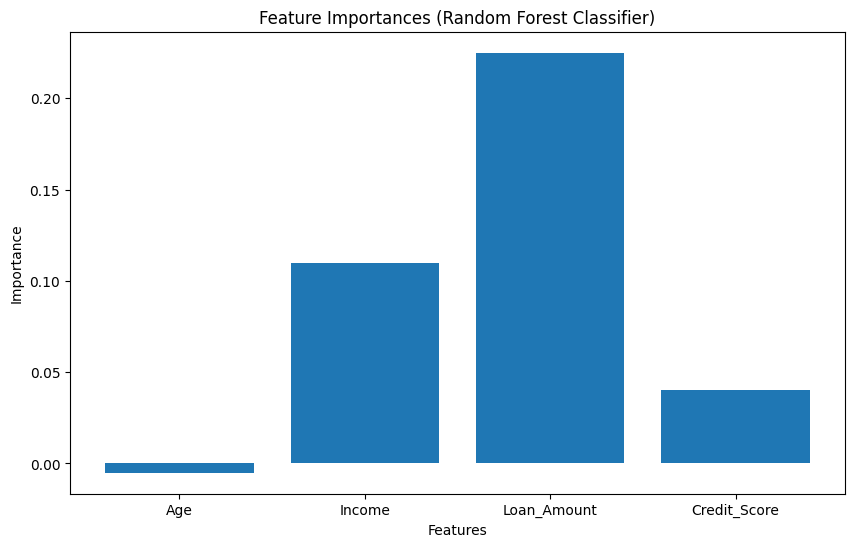

In [ ]:
for i, feature in enumerate(X.columns):
    print(f"Classifier - {feature}: {importances_classifier[i]:.4f}")
    print(f"Regressor - {feature}: {importances_regressor[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances_classifier)
plt.title("Feature Importances (Random Forest Classifier)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

###Question#3

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)


tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

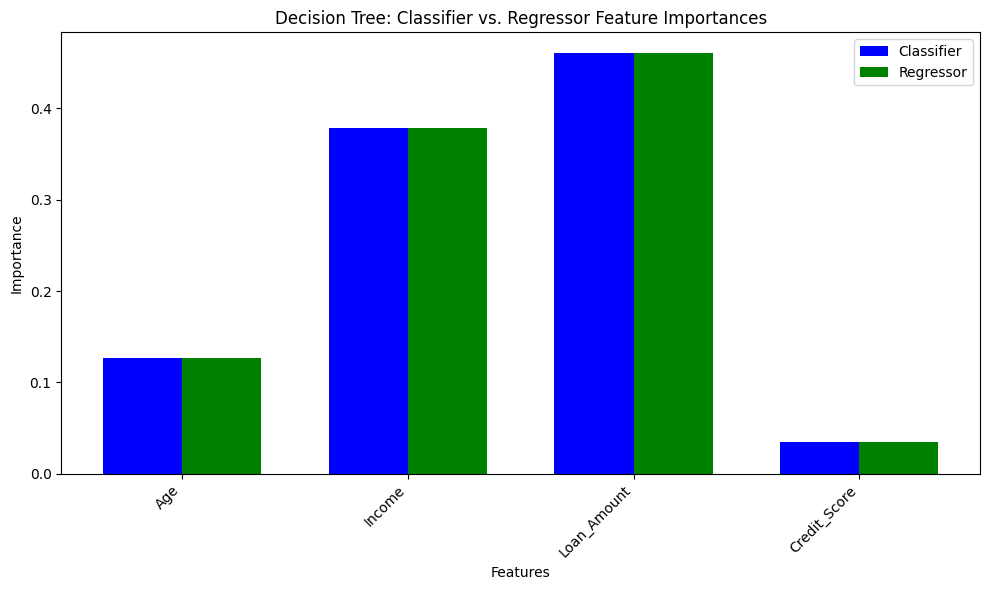

In [ ]:
classifier_importances = tree_classifier.feature_importances_
regressor_importances = tree_regressor.feature_importances_

feature_names = X.columns

bar_width = 0.35
index = np.arange(len(feature_names))

fig, ax = plt.subplots(figsize=(10, 6))
classifier_bars = ax.bar(index, classifier_importances, bar_width, label='Classifier', color='blue')
regressor_bars = ax.bar(index + bar_width, regressor_importances, bar_width, label='Regressor', color='green')

ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Decision Tree: Classifier vs. Regressor Feature Importances')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

###Question#4

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

svm_predictions = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 1.0


###Question#5

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.5104 - loss: 0.7664 - val_accuracy: 0.5625 - val_loss: 0.7708
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5104 - loss: 0.7786 - val_accuracy: 0.5625 - val_loss: 0.7660
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5104 - loss: 0.7825 - val_accuracy: 0.5625 - val_loss: 0.7613
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5208 - loss: 0.7485 - val_accuracy: 0.5625 - val_loss: 0.7568
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5833 - loss: 0.7054 - val_accuracy: 0.5625 - val_loss: 0.7523
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5417 - loss: 0.7257 - val_accuracy: 0.5625 - val_loss: 0.7477
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5312 - loss: 0.7153 - val_accuracy: 0.5625 - val_loss: 0.7432
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5417 - loss: 0.7003 - val_accuracy: 0.5625 - val_loss: 0.7386

In [ ]:
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8000 - loss: 0.4533
Neural Network Accuracy: 0.800000011920929
